In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [2]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
f = open('data.txt', 'r')
text = f.read()

In [5]:
text[:1000]

"The Project Gutenberg EBook of Man to Man, by Jackson Gregory\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Man to Man\n\nAuthor: Jackson Gregory\n\nRelease Date: July 29, 2006 [EBook #18933]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MAN TO MAN ***\n\n\n\n\nProduced by Al Haines\n\n\n\n\n\n\n\n\n\n\n[Frontispiece: The blazing heat was such that men and horses and steers\nsuffered terribly.]\n\n\n\n\n\n\nMAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nAUTHOR OF\n\nJUDITH OF BLUE LAKE RANCH, THE BELLS OF SAN JUAN, SIX FEET FOUR, ETC.\n\n\n\n\nILLUSTRATED BY\n\nJ. G. SHEPHERD\n\n\n\n\n\nGROSSET & DUNLAP\n\nPUBLISHERS -------- NEW YORK\n\n\n\n\nCOPYRIGHT, 1920, BY\n\nCHARLES SCRIBNER'S SONS\n\n\nPublished October, 1920\n\n\n\n\nCONTENTS\n\n\nCHAPTER

In [ ]:
# farkli split cesitlerinin etkileri

In [6]:
a = text.split()

In [7]:
len(a)

78078

In [8]:
b = text.split("\n")

In [9]:
len(b)

9770

In [10]:
b[:5]

['The Project Gutenberg EBook of Man to Man, by Jackson Gregory',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included']

In [12]:
sent_tokens = sent_tokenize(text)

In [14]:
sent_tokens[:3]

['The Project Gutenberg EBook of Man to Man, by Jackson Gregory\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.',
 'You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Man to Man\n\nAuthor: Jackson Gregory\n\nRelease Date: July 29, 2006 [EBook #18933]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MAN TO MAN ***\n\n\n\n\nProduced by Al Haines\n\n\n\n\n\n\n\n\n\n\n[Frontispiece: The blazing heat was such that men and horses and steers\nsuffered terribly.]',
 'MAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nAUTHOR OF\n\nJUDITH OF BLUE LAKE RANCH, THE BELLS OF SAN JUAN, SIX FEET FOUR, ETC.']

In [15]:
len(sent_tokens)

5560

In [16]:
df = pd.DataFrame({'sentences': sent_tokens})

In [17]:
df.head()

,sentences
0,"The Project Gutenberg EBook of Man to Man, by ..."
1,"You may copy it, give it away or\nre-use it un..."
2,MAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nA...
3,ILLUSTRATED BY\n\nJ. G. SHEPHERD\n\n\n\n\n\nGR...
4,MISS BLUE CLOAK KNOWS WHEN SHE'S BEAT\n III.


In [18]:
df.shape

(5560, 1)

In [19]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

In [24]:
def cleaning(data):
    
    # 1. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    # 2. Remove Punctuations
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    # 3. Remove Stopwords
    tokens_without_sw = {t for t in tokens_without_punc if t not in stop_words}
    
    # 4. Lemmatization
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # 5. Joining
    return " ".join(text_cleaned)  # join() kullanmadan yapilan sonuc sekilde - list kullanmak gerekirse

In [25]:
df['sentences_2'] = df['sentences'].apply(cleaning)

In [26]:
df.head(3)

,sentences,sentences_2
0,"The Project Gutenberg EBook of Man to Man, by ...",almost gregory project anywhere cost gutenberg...
1,"You may copy it, give it away or\nre-use it un...",suffered blazing heat produced july men gutenb...
2,MAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nA...,san judith gregory foot lake four man author r...


son satir join kullanmsaydik, asagidaki gibi bir df alacaktik

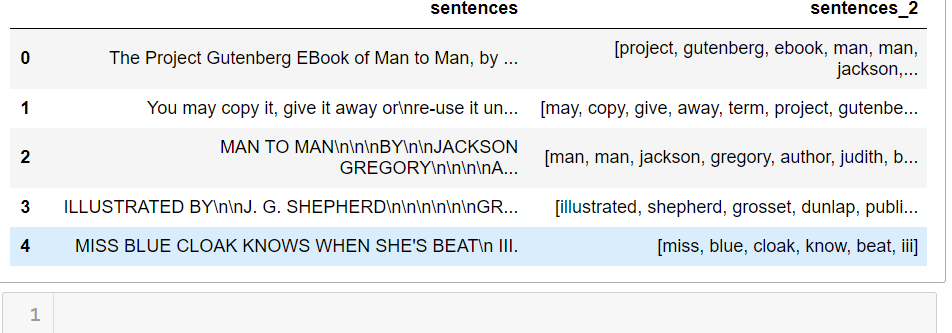

In [27]:
df['length']=df.sentences_2.apply(len)

In [28]:
df.head(3)

,sentences,sentences_2,length
0,"The Project Gutenberg EBook of Man to Man, by ...",almost gregory project anywhere cost gutenberg...,98
1,"You may copy it, give it away or\nre-use it un...",suffered blazing heat produced july men gutenb...,224
2,MAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nA...,san judith gregory foot lake four man author r...,81


In [29]:
df.drop('length', axis =1, inplace = True)

In [30]:
df.head(3)

,sentences,sentences_2
0,"The Project Gutenberg EBook of Man to Man, by ...",almost gregory project anywhere cost gutenberg...
1,"You may copy it, give it away or\nre-use it un...",suffered blazing heat produced july men gutenb...
2,MAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nA...,san judith gregory foot lake four man author r...


In [31]:
df.sentences[0]

'The Project Gutenberg EBook of Man to Man, by Jackson Gregory\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.'

In [32]:
df.sentences_2[0]

'almost gregory project anywhere cost gutenberg man ebook restriction jackson use anyone whatsoever'

In [33]:
df.sentences[1]

'You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Man to Man\n\nAuthor: Jackson Gregory\n\nRelease Date: July 29, 2006 [EBook #18933]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MAN TO MAN ***\n\n\n\n\nProduced by Al Haines\n\n\n\n\n\n\n\n\n\n\n[Frontispiece: The blazing heat was such that men and horses and steers\nsuffered terribly.]'

In [34]:
df.sentences_2[1]

'suffered blazing heat produced july men gutenberg ebook start jackson english al haines gregory date copy included title language away online term give frontispiece release project man author horse license terribly may steer'

**PoST**

In [35]:
df['sentences_3'] = df['sentences_2'].apply(lambda x: x.split())  # sentences_3'te join'siz haline donmek isteriz

In [36]:
df.head(3)

,sentences,sentences_2,sentences_3
0,"The Project Gutenberg EBook of Man to Man, by ...",almost gregory project anywhere cost gutenberg...,"[almost, gregory, project, anywhere, cost, gut..."
1,"You may copy it, give it away or\nre-use it un...",suffered blazing heat produced july men gutenb...,"[suffered, blazing, heat, produced, july, men,..."
2,MAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nA...,san judith gregory foot lake four man author r...,"[san, judith, gregory, foot, lake, four, man, ..."


In [38]:
df['sentences_4'] = df['sentences_3'].apply(lambda x: nltk.pos_tag(x))

In [39]:
df.head(3)

,sentences,sentences_2,sentences_3,sentences_4
0,"The Project Gutenberg EBook of Man to Man, by ...",almost gregory project anywhere cost gutenberg...,"[almost, gregory, project, anywhere, cost, gut...","[(almost, RB), (gregory, NN), (project, NN), (..."
1,"You may copy it, give it away or\nre-use it un...",suffered blazing heat produced july men gutenb...,"[suffered, blazing, heat, produced, july, men,...","[(suffered, VBD), (blazing, VBG), (heat, NN), ..."
2,MAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nA...,san judith gregory foot lake four man author r...,"[san, judith, gregory, foot, lake, four, man, ...","[(san, JJ), (judith, NN), (gregory, JJ), (foot..."


pos_tag icin once list haline (split) getirmemiz gerekli

NNP'leri korumak istersek, fonksiyondaki .lower() kaldirmak gerekirdi..

**Vectorization**

**1. Count Vectorization**

Apply to series, not to a dataframe

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Data'nin cleaning islemi bitti, sayisal hale getirme asamasi..

In [41]:
X_train = df['sentences_2']

In [43]:
vectorizer = CountVectorizer()

In [44]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [45]:
vectorizer.get_feature_names()[:5]

['aback', 'abandoned', 'abide', 'abiding', 'ability']

In [47]:
len(vectorizer.get_feature_names())  # unique kelime sayisi

5974

In [48]:
X_train_count = vectorizer.transform(X_train)

In [49]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
a = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

In [57]:
pd.set_option('display.max_columns', 500)

In [58]:
a.head()

,aback,abandoned,abide,abiding,ability,able,aboard,abreast,abrupt,abruptly,abruptness,absence,absent,absently,absolute,absolutely,abstraction,absurd,abundant,accelerator,accept,accepted,accepting,access,accessed,accessible,accident,accommodate,accommodating,accompanying,accomplish,accomplished,accordance,accordin,according,account,accounted,accrued,accustomed,ace,achieved,achieving,acknowledge,acknowledgment,acquaintance,acquainted,acquiescence,acquired,acquiring,acre,acreage,acrid,across,act,acting,action,active,activity,actor,actual,actuality,actually,actuated,acumen,adage,adam,add,added,addition,additional,address,addressed,addressing,adequately,adjoining,adjust,admiration,admiringly,admit,admitted,admonished,adopting,adorable,adorably,advance,advanced,advancing,advantage,adventure,adventurer,adversary,advice,advise,advised,aeroplane,affair,affected,afraid,afternoon,age,agent,ago,agree,agreed,agreement,ah,ahead,ai,aid,aiding,aimless,air,ak,akin,al,alarm,albeit,albino,alert,alike,alive,allow,allowance,allowed,allowin,allowing,alluring,almost,aloft,alone,along,alongside,aloof,aloofly,aloofness,aloud,already,also,alter,alteration,altered,alternate,alternately,although,altitude,altogether,always,amassed,amazement,amazingly,amended,amity,among,amount,amounting,ample,amply,amused,amusement,amusing,ancient,andy,anew,anger,angered,angle,angrier,angrily,angry,animal,animation,ankle,annihilation,announced,announcing,annoyance,annoying,annual,another,answer,answered,answering,ante,anticipated,anticipation,anxiety,anxious,anxiously,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,apathetically,apathy,aped,apiece,apparatus,appeal,appear,appearance,appeared,appearing,appears,appetite,applicable,applied,apply,appointed,appointment,appraising,appreciate,appreciating,appreciation,appreciative,apprising,approach,approaching,approval,approvingly,approximately,apt,arabian,arc,arch,arched,archive,area,argued,arguing,argyment,arise,arisen,arm,armed,armful,army,arose,aroun,around,aroused,arrange,arranged,arrangement,arranging,array,arrested,...,wanly,want,wanted,wantin,war,ward,warm,warmed,warmly,warn,warned,warning,warningly,warrant,warranty,washout,wasted,wastin,wasting,watch,watched,watchful,watchfully,watchfulness,watchin,watching,water,watered,watery,waved,wavering,waving,way,weak,weakly,wealth,wearer,wearily,wearing,weary,weatherbeaten,web,wednesday,wee,week,weighing,weight,welcome,welcomed,well,wench,went,west,western,wet,whatcha,whatever,whatsoever,wheel,wheeled,wheeling,whence,whenever,whereat,whereby,whereupon,wherever,whether,whine,whip,whipped,whippersnapper,whippin,whipping,whirled,whirling,whisked,whisker,whiskey,whisper,whispered,whistle,whistled,whistling,whit,white,whitest,whitey,whizzed,whole,whose,wid,wide,widely,widened,widening,wider,widest,width,wielder,wife,wild,wildcat,wilder,wilderness,wildest,wildly,william,willies,willing,willingly,willingness,willow,wilson,wilting,wimble,win,wince,wind,windily,winding,window,windy,wine,wing,winging,winked,winking,winning,winter,wiped,wire,wired,wisdom,wise,wisely,wish,wished,wishing,wisp,wistfully,wit,withal,withdrawing,withdrawn,withdrew,wither,withered,withering,within,without,witness,wo,woke,woman,wonder,wondered,wonderfully,wondering,wonderingly,wonderment,wood,wooded,wooden,woodland,woodsy,word,wordless,wordlessly,wore,work,worked,workin,working,world,worldly,worm,worn,worry,worrying,worse,worst,worsted,worth,worthless,worthy,would,wound,wrath,wrathful,wrathfully,wreckage,wrench,wrenching,wretched,wriggle,wriggled,wrinkled,write,writes,writing,written,wrong,wrote,wrung,xi,xii,xiii,xiv,xix,xv,xvi,xvii,xviii,xx,xxi,xxii,xxiii,xxiv,xxv,xxvi,xxvii,yanked,yard,yarn,yawning,year,yearning,yeee,yell,yelled,yellin,yelling,yellow,yes,yessir,yesterday,yet,yets,yield,yielded,yielding,yonder,york,young,youngest,yourse,youth,youthful,zest
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [59]:
a.shape

(5560, 5974)

**2. TF/IDF**

In [60]:
tf_idf_vectorizer = TfidfVectorizer()

In [61]:
tf_idf_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [62]:
X_train_tf_idf = tf_idf_vectorizer.transform(X_train)

In [63]:
b = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

In [65]:
b.sample(10)

,aback,abandoned,abide,abiding,ability,able,aboard,abreast,abrupt,abruptly,abruptness,absence,absent,absently,absolute,absolutely,abstraction,absurd,abundant,accelerator,accept,accepted,accepting,access,accessed,accessible,accident,accommodate,accommodating,accompanying,accomplish,accomplished,accordance,accordin,according,account,accounted,accrued,accustomed,ace,achieved,achieving,acknowledge,acknowledgment,acquaintance,acquainted,acquiescence,acquired,acquiring,acre,acreage,acrid,across,act,acting,action,active,activity,actor,actual,actuality,actually,actuated,acumen,adage,adam,add,added,addition,additional,address,addressed,addressing,adequately,adjoining,adjust,admiration,admiringly,admit,admitted,admonished,adopting,adorable,adorably,advance,advanced,advancing,advantage,adventure,adventurer,adversary,advice,advise,advised,aeroplane,affair,affected,afraid,afternoon,age,agent,ago,agree,agreed,agreement,ah,ahead,ai,aid,aiding,aimless,air,ak,akin,al,alarm,albeit,albino,alert,alike,alive,allow,allowance,allowed,allowin,allowing,alluring,almost,aloft,alone,along,alongside,aloof,aloofly,aloofness,aloud,already,also,alter,alteration,altered,alternate,alternately,although,altitude,altogether,always,amassed,amazement,amazingly,amended,amity,among,amount,amounting,ample,amply,amused,amusement,amusing,ancient,andy,anew,anger,angered,angle,angrier,angrily,angry,animal,animation,ankle,annihilation,announced,announcing,annoyance,annoying,annual,another,answer,answered,answering,ante,anticipated,anticipation,anxiety,anxious,anxiously,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,apathetically,apathy,aped,apiece,apparatus,appeal,appear,appearance,appeared,appearing,appears,appetite,applicable,applied,apply,appointed,appointment,appraising,appreciate,appreciating,appreciation,appreciative,apprising,approach,approaching,approval,approvingly,approximately,apt,arabian,arc,arch,arched,archive,area,argued,arguing,argyment,arise,arisen,arm,armed,armful,army,arose,aroun,around,aroused,arrange,arranged,arrangement,arranging,array,arrested,...,wanly,want,wanted,wantin,war,ward,warm,warmed,warmly,warn,warned,warning,warningly,warrant,warranty,washout,wasted,wastin,wasting,watch,watched,watchful,watchfully,watchfulness,watchin,watching,water,watered,watery,waved,wavering,waving,way,weak,weakly,wealth,wearer,wearily,wearing,weary,weatherbeaten,web,wednesday,wee,week,weighing,weight,welcome,welcomed,well,wench,went,west,western,wet,whatcha,whatever,whatsoever,wheel,wheeled,wheeling,whence,whenever,whereat,whereby,whereupon,wherever,whether,whine,whip,whipped,whippersnapper,whippin,whipping,whirled,whirling,whisked,whisker,whiskey,whisper,whispered,whistle,whistled,whistling,whit,white,whitest,whitey,whizzed,whole,whose,wid,wide,widely,widened,widening,wider,widest,width,wielder,wife,wild,wildcat,wilder,wilderness,wildest,wildly,william,willies,willing,willingly,willingness,willow,wilson,wilting,wimble,win,wince,wind,windily,winding,window,windy,wine,wing,winging,winked,winking,winning,winter,wiped,wire,wired,wisdom,wise,wisely,wish,wished,wishing,wisp,wistfully,wit,withal,withdrawing,withdrawn,withdrew,wither,withered,withering,within,without,witness,wo,woke,woman,wonder,wondered,wonderfully,wondering,wonderingly,wonderment,wood,wooded,wooden,woodland,woodsy,word,wordless,wordlessly,wore,work,worked,workin,working,world,worldly,worm,worn,worry,worrying,worse,worst,worsted,worth,worthless,worthy,would,wound,wrath,wrathful,wrathfully,wreckage,wrench,wrenching,wretched,wriggle,wriggled,wrinkled,write,writes,writing,written,wrong,wrote,wrung,xi,xii,xiii,xiv,xix,xv,xvi,xvii,xviii,xx,xxi,xxii,xxiii,xxiv,xxv,xxvi,xxvii,yanked,yard,yarn,yawning,year,yearning,yeee,yell,yelled,yellin,yelling,yellow,yes,yessir,yesterday,yet,yets,yield,yielded,yielding,yonder,york,young,youngest,yourse,youth,youthful,zest
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [67]:
b.max()  # her column icin en yuksek tf/idf gosterir

aback        0.437097
abandoned    0.400340
abide        0.326126
abiding      0.348628
ability      0.331814
               ...   
youngest     0.510208
yourse       0.721557
youth        0.413748
youthful     0.351610
zest         0.397032
Length: 5974, dtype: float64

In [69]:
b.max().sort_values()

occur           0.17623
harmless        0.17623
modification    0.17623
production      0.17623
alteration      0.17623
                 ...   
said            1.00000
section         1.00000
spying          1.00000
square          1.00000
invitation      1.00000
Length: 5974, dtype: float64

In [70]:
a.sum().sort_values(ascending = False)

steve       537
packard     517
blenham     483
man         401
terry       393
           ... 
rightful      1
fox           1
ripe          1
founded       1
skinned       1
Length: 5974, dtype: int64

In [71]:
b.sum().sort_values(ascending = False)

steve         126.533089
blenham       124.142623
packard       118.164002
terry         106.890122
said           95.629575
                 ...    
arise           0.176230
deletion        0.176230
production      0.176230
promotion       0.176230
alteration      0.176230
Length: 5974, dtype: float64